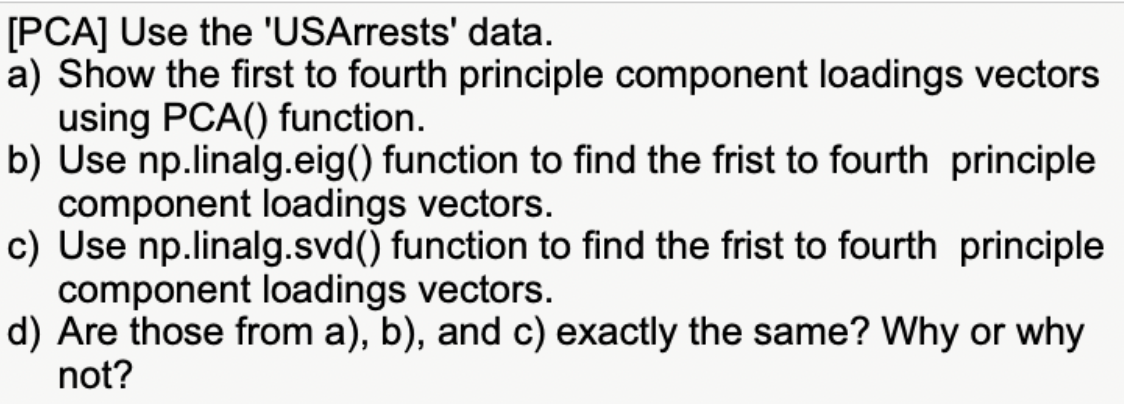

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ccad4a60190f2c6d89d19698fa7a6e0bd1c7661c559a48dec655e499bc0e52ae
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

###a) Show the first to fourth principle component loadings vectors using PCA) function.



In [15]:
!pip install statsmodels
import pandas as pd
from statsmodels.api import datasets
from sklearn.preprocessing import StandardScaler

usarrests = datasets.get_rdataset("USArrests", "datasets").data
print(usarrests.head())

scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

print(pd.DataFrame(X, columns=usarrests.columns).head())

            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
     Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814


In [11]:
import pandas as pd
from statsmodels.api import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

usarrests = datasets.get_rdataset("USArrests", "datasets").data

scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

pca = PCA(n_components=4)
pca.fit(X)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(4)], index=usarrests.columns)
print(loadings)


               PC1       PC2       PC3       PC4
Murder    0.535899 -0.418181 -0.341233 -0.649228
Assault   0.583184 -0.187986 -0.268148  0.743407
UrbanPop  0.278191  0.872806 -0.378016 -0.133878
Rape      0.543432  0.167319  0.817778 -0.089024


This table shows the loading vectors from the PCA (Principal Component Analysis) of the USArrests dataset. Each value represents how much each original variable (Murder, Assault, UrbanPop, Rape) contributes to the first four principal components (PC1 to PC4).

Principal Components (PC1, PC2, PC3, PC4):

* These are new variables that are linear combinations of the original variables. PC1 captures the most variance in the data, followed by PC2, and so on.
Loading Vectors:

* Each number indicates how much a variable contributes to a principal component. For example, in PC1, "Murder" has a loading of 0.535899, meaning it has a strong influence on PC1. Positive values show positive contributions, while negative values show negative contributions.
Interpretation:

* PC1 is most influenced by "Murder," "Assault," and "Rape," meaning these variables contribute most to this component.
PC2 is primarily influenced by "UrbanPop," showing that it reflects the variation in the urban population.


### b) Use np.linalg.eig() function to find the frist to fourth principle component loadings vectors.



In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

cov_matrix = np.cov(X.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

loadings = pd.DataFrame(eigenvectors[:, :4], columns=[f'PC{i+1}' for i in range(4)], index=usarrests.columns)
print(loadings)

               PC1       PC2       PC3       PC4
Murder    0.535899  0.418181  0.649228 -0.341233
Assault   0.583184  0.187986 -0.743407 -0.268148
UrbanPop  0.278191 -0.872806  0.133878 -0.378016
Rape      0.543432 -0.167319  0.089024  0.817778


###c) Use np.linalg.svd（） function to find the frist to fourth principle component loadings vectors.



In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

U, S, Vt = np.linalg.svd(X)

loadings = pd.DataFrame(Vt.T[:, :4], columns=[f'PC{i+1}' for i in range(4)], index=usarrests.columns)
print(loadings)

               PC1       PC2       PC3       PC4
Murder   -0.535899 -0.418181  0.341233  0.649228
Assault  -0.583184 -0.187986  0.268148 -0.743407
UrbanPop -0.278191  0.872806  0.378016  0.133878
Rape     -0.543432  0.167319 -0.817778  0.089024


### d) Are those from a), b), and c) exactly the same? Why or why not?

The results from methods a) PCA(), b) np.linalg.eig(), and c) np.linalg.svd() are mostly the same in terms of the values they produce. However, there can be differences in the signs of the loading vectors. This is because principal component analysis (PCA) only determines the direction of each component, and the signs (positive or negative) of the vectors can be flipped without changing the meaning. So, while the numeric values are the same, the signs might differ due to how the algorithms calculate the components.